In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Working on Optical Recognition of handwritten digits dataset 
train_data = pd.read_csv('optdigits_train.csv', header=None)
test_data = pd.read_csv('optdigits_test.csv', header=None)
train_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
5,0,0,11,16,10,1,0,0,0,4,...,3,0,0,10,16,16,16,16,6,2
6,0,0,1,11,13,11,7,0,0,0,...,0,0,0,1,13,5,0,0,0,5
7,0,0,8,10,8,7,2,0,0,1,...,0,0,0,4,13,8,0,0,0,5
8,0,0,15,2,14,13,2,0,0,0,...,0,0,0,10,12,5,0,0,0,0
9,0,0,3,13,13,2,0,0,0,6,...,0,0,0,3,15,11,6,0,0,8


In [3]:
X = np.array(train_data.loc[:,:63])
Y = np.array(train_data[64])
X = (X - X.min())/(X.max() - X.min())

Xt = np.array(test_data.loc[:,:63])
Xt = (Xt - Xt.min())/(Xt.max() - Xt.min())
Yt = np.array(test_data[64])

nt = []
for i in Yt:
    op = [0,0,0,0,0,0,0,0,0,0]
    op[i] = 1
    nt.append(op)
Yt = np.array(nt) 

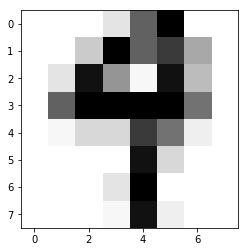

In [4]:
images = []
for i in range(len(X)):
    images.append(X[i].reshape(8,8))
  
plt.imshow(images[3], cmap='Greys')

In [5]:
nt = []
for i in Y:
    op = [0,0,0,0,0,0,0,0,0,0]
    op[i] = 1
    nt.append(op)
Y = np.array(nt) 

# Dividing train dataset into 5 batches for training
xbatch = np.array_split(X, 5)
ybatch = np.array_split(Y, 5)

xtrain1 = xbatch[0]
xtrain2 = xbatch[1]
xtrain3 = xbatch[2]
xtrain4 = xbatch[3]
xtrain5 = xbatch[4]
xtrain = [xtrain1,xtrain2,xtrain3,xtrain4,xtrain5]

ytrain1 = ybatch[0]
ytrain2 = ybatch[1]
ytrain3 = ybatch[2]
ytrain4 = ybatch[3]
ytrain5 = ybatch[4]
ytrain = [ytrain1,ytrain2,ytrain3,ytrain4,ytrain5]

In [6]:
# Activation function and its derivative

# Hyberbolic Tan function
def tanh(x):
    return np.tanh(x)

# Derivative of Tan function
def dtanh(x):
    return 1.0 - (np.power(np.tanh(x),2))

In [7]:
def feed_forward(input_data,w0,w1,w2,w3,b0,b1,b2,b3):
    '''
    The Feed-forward considers 5 layers including input and output layer.
    
    The output layer/neuron is a classification node.
    
    returns: state of each layer
    '''
    layer0 = input_data
    layer1 = tanh(np.dot(layer0, w0) + b0)
    layer2 = tanh(np.dot(layer1, w1) + b1)
    layer3 = tanh(np.dot(layer2, w2) + b2)
    layer4 = tanh(np.dot(layer3, w3) + b3)
    
    return layer0, layer1, layer2, layer3, layer4

In [8]:
def backpropogate(i, layer0, layer1, layer2, layer3, layer4, actual_y, w0,w1,w2,w3,b0,b1,b2,b3, learning_rate):
    '''
    This backpropogate is only slightly different from a regular classifier
    in ways in which the output layer gradient is calculated.
    
    returns: weights and bias matrices
    '''
    l4_error = layer4 - actual_y
    l4_delta = l4_error * dtanh(layer4)
    dh4 = np.dot(layer3.T, l4_delta)
    
    l3_error = l4_delta.dot(w3.T)
    l3_delta = l3_error * dtanh(layer3)
    dh3 = np.dot(layer2.T, l3_delta)
    
    l2_error = l3_delta.dot(w2.T)
    l2_delta = l2_error * dtanh(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * dtanh(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w3 = w3 - (learning_rate * dh4)
    w2 = w2 - (learning_rate * dh3)
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
    
    b3 = b3 - (learning_rate * np.mean(l4_delta))
    b2 = b2 - (learning_rate * np.mean(l3_delta))
    b1 = b1 - (learning_rate * np.mean(l2_delta))
    b0 = b0 - (learning_rate * np.mean(l1_delta))    
   
    if i%10==0 and (i!=0):
        loss = np.mean(np.power(layer4-actual_y, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%100 == 0:
            print("\n", int(i), loss)

        
    return w0,w1,w2,w3,b0,b1,b2,b3

In [ ]:
def accuracy(testx, testy):
    correct = 0
    layer0, layer1, layer2, layer3, layer4 = feed_forward(testx,w0, w1,w2,w3, b0,b1,b2,b3)
    for i in range(len(testx)):
        if np.argmax(layer4[i]) == np.argmax(testy[i]):
            correct +=1 
            
    return f"Accuracy: {correct*100/len(testy)}%"

In [9]:
w0 = np.random.random((64,53))
w1 = np.random.random((53,35))
w2 = np.random.random((35,25))
w3 = np.random.random((25,10))

b0 = np.random.random((1,1))-1
b1 = np.random.random((1,1))-1
b2 = np.random.random((1,1))-1
b3 = np.random.random((1,1))-1

epochs = 1000

In [10]:
# Initialising variables to track loss vs iterations so we can plot the changes
loss_curve = []
iters = []

In [23]:
# Training the neural network for 5 batches of train dataset
for i in range(epochs):
    for j in range(len(xtrain)):
        layer0, layer1, layer2, layer3, layer4 = feed_forward(xtrain[j],w0,w1,w2,w3,b0,b1,b2,b3)
        w0,w1,w2,w3,b0,b1,b2,b3 = backpropogate(i, layer0, layer1, layer2, layer3, layer4, ytrain[j], w0, w1, w2, w3,
                                            b0, b1, b2, b3, 0.001 )


 100 0.005250026140681541

 100 0.0071455972450259995

 100 0.006436561247426028

 100 0.006499382932895421

 100 0.006170938060272758

 200 0.00555727149464593

 200 0.006557384300071975

 200 0.006271095912300445

 200 0.00676060867910272

 200 0.006098646008553302

 300 0.005167044686629788

 300 0.007041394677907908

 300 0.00558777236502631

 300 0.006823155714833619

 300 0.005820205363671602

 400 0.0053748062415083855

 400 0.0064552959664691675

 400 0.0056372796314213105

 400 0.006433284120665829

 400 0.005647096576128355

 500 0.005468002289179236

 500 0.005901899904609638

 500 0.005540869051041336

 500 0.0063981700684851185

 500 0.005699340823350838

 600 0.005817405430747399

 600 0.006307666663537163

 600 0.006051649053231525

 600 0.006490547248510179

 600 0.0056155670986254205

 700 0.005268784981924161

 700 0.006644475679332998

 700 0.0052207540120823995

 700 0.006859878156752968

 700 0.0053404334583910295

 800 0.005641748945483954

 800 0.006199198851381

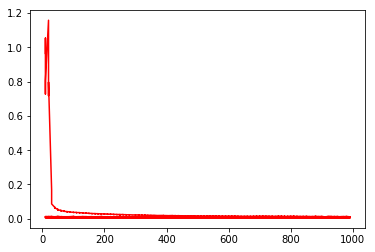

In [24]:
plt.plot(iters, loss_curve,'r')

In [25]:
# Accuracy of train dataset
accuracy(xtrain5,ytrain5)

'Accuracy: 98.69109947643979%'

In [26]:
# Accuracy of test dataset
accuracy(Xt,Yt)

'Accuracy: 93.43350027824151%'